# Science Case Footprints

In 2024, the astronomical community submitted a set of White Papers and Science Pitches regarding the science that could be done with a Roman survey of the Galactic Plane.  Many of these contributions identified numerous specific regions of interest, and preferred filters for the observations.  

In this notebook, we extract the specified regions and filter sets with the goal of combining them into single overall desired survey footprint.  

In [1]:
from os import path, getcwd
from sys import path as pythonpath
pythonpath.append(path.join(getcwd(), '..'))
import config_utils
import survey_footprints
import regions
import healpy as hp
from mw_plot import MWSkyMap, MWSkyMapBokeh
from astropy_healpix import HEALPix
from astropy import units as u
from astropy.coordinates import Galactic, TETE, SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
from os import path
%matplotlib inline


# Configure path to local repository
root_dir = '/Users/rstreet/software/rgps'

File config/rgps_survey_regions.json contains the desired survey regions from each community contribution, described in machine-readable form.

Note that not all of the science cases specified explicit regions or filter selections.  Those that did have been marked 'ready_for_use': 'True'; further details will be sought from the authors for the remaining science cases. 

In [2]:
sim_config = config_utils.read_config(path.join(getcwd(), '..', 'config', 'sim_config.json'))

In [3]:
config = config_utils.read_config(path.join(root_dir, 'config', 'rgps_science_cases.json'))

In [11]:
author = 'Gallart'
category = 'wide_area'
optic = 'F213'
science_regions = regions.load_regions_from_file(sim_config,
                                                         path.join(root_dir, 'region_data', 'rgps_science_regions_' + category + '.json'))

In [12]:
science_regions[author][optic]

Let's inspect an example region map, for illustration

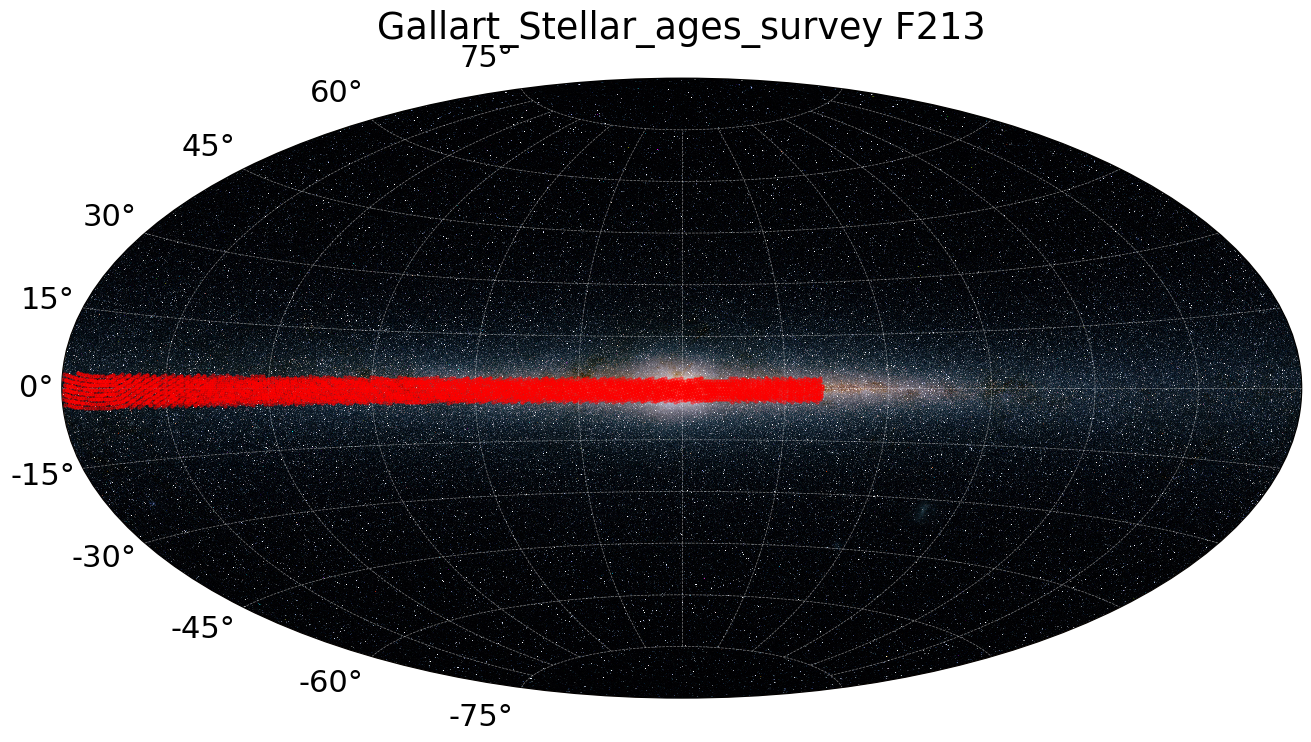

In [13]:
rlist = science_regions[author][optic]
for r in rlist:
    r.sky_plot()

## Building a combined survey region

With our set of desired survey regions now defined, we can combine them to form the overall survey region. 
Since all selected HEALpixels have a value of 1.0 and zero elsewhere, we can just co-add the region maps for each filter, to see which sky regions are highest priority.  

In [ ]:
# Dictionary of the combined survey regions per optical component
combined_regions = {}

# In order to use the plotting method of the CelestialRegion object, we can create separate regions for the combined maps 
for optic, region_list in desired_regions.items():
    if len(region_list) > 0:
        r_merge = regions.combine_regions(region_list)
        r_merge.optic = optic
        r_merge.label = 'Combined survey footprint'

        mw1 = MWSkyMap(projection='aitoff', grayscale=False, grid='galactic', background='infrared', figsize=(16, 10))
        mw1.title = r_merge.label + ' ' + r_merge.optic
        s = r_merge.pixels_to_skycoords()
        mw1.scatter(s.ra.deg * u.deg, s.dec.deg * u.deg, c=r_merge.region_map[r_merge.pixels], cmap='Reds', s=5, alpha=0.4)
        plt.rcParams.update({'font.size': 22})

        plt.tight_layout()
        plt.savefig(path.join(root_dir, 'survey_maps', 'survey_map_'+r_merge.optic+'.png'))
                    
        combined_regions[optic] = r_merge

In the plots above, the color of each survey tile scales according to the number of science cases that requested that tile be observed in the given filter, with deep red indicating the highest number of 'votes' for a tile.  

We can also plot interactive versions of this plot, although unfortunately only the optical background image seems to be available.  

In [ ]:
mw2 = MWSkyMapBokeh()
s = combined_regions['F213'].pixels_to_skycoords()
mw2.scatter(s.ra.deg*u.deg, s.dec.deg*u.deg, c="r", s=5, alpha=0.4)
mw2.show()